**Assignment 3: Temporal Visualization**

You have two tasks for this assignment: 

1. Temporally visualize the closing price of at least 4 different stocks. Then, plot the mean closing price between all of your chosen stocks. Make the mean more visible than the other lines on the plot with transparency and/or color settings. Refer to the "Case Study: Global Normalcy Index from The Economist" image from Slide 22 for an example of what this might look like. 

2. Plot a percent stacked area chart of the volume for the stocks you used in part 1. Refer to "Percent Area Chart" from Slide 30 for an example of what it will look like.

For this assignment, we will be using the yfinance library to get our stock data. We will also be using Pandas to get the specific information we want (e.g. closing price). Examples are provided below to guide you on how to load and process data. You can also refer to this website for guidance on how to use yfinance: https://algotrading101.com/learn/yfinance-guide/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.dates as mdates

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Example stocks. You can use any you want!
fb = yf.Ticker('META')
amzn = yf.Ticker('AMZN')
aapl = yf.Ticker('AAPL')
goog = yf.Ticker('GOOG')

In [3]:
# Create a three column dataframe/table containing the dates, closing prices, and volumns (columns) of stocks.
# Example using AMZN:

# history contains the data you may want. See yfinance for more details.
amzn_hist = amzn.history(period="max", auto_adjust=True) 
amzn_df = pd.DataFrame() 
amzn_df['dates'] = amzn_hist.index # Put the dates into the first column 
# Corresponding closing prices and volumes for each date in the next two columns
amzn_df['closing price'] = amzn_hist['Close'].values 
amzn_df['volume'] = amzn_hist['Volume'].values
amzn_df # Print what your dataframe looks like

,dates,closing price,volume
0,1997-05-15 00:00:00-04:00,0.097917,1443120000
1,1997-05-16 00:00:00-04:00,0.086458,294000000
2,1997-05-19 00:00:00-04:00,0.085417,122136000
3,1997-05-20 00:00:00-04:00,0.081771,109344000
4,1997-05-21 00:00:00-04:00,0.071354,377064000
...,...,...,...
6514,2023-04-04 00:00:00-04:00,103.949997,48662500
6515,2023-04-05 00:00:00-04:00,101.099998,45175400
6516,2023-04-06 00:00:00-04:00,102.059998,43808000
6517,2023-04-10 00:00:00-04:00,102.169998,37221500


Now that you have the dates and closing prices of AMZN in a dataframe, you can plot! You can access a specific column of a dataframe with:



```
df['column_name']
```

And you can plot it directly or use it as an array of values.



```
x = df['x_axis']
y = df['y_axis']
plt.plot(x, y)
```




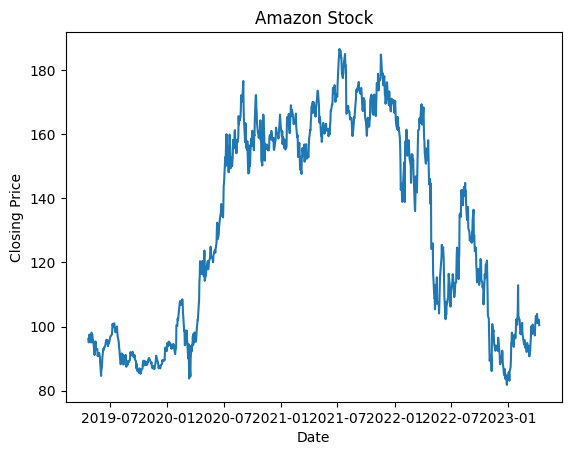

In [4]:
# Plot the dates vs. closing price for AMZN
fig = plt.figure()
data = [amzn_df]
for frame in [amzn_df]:
    frame = frame.tail(1000) # Return the last 1000 trading days' worth of data
    plt.plot(frame['dates'], frame['closing price'])

plt.xlabel('Date') 
plt.ylabel('Closing Price') 
plt.title("Amazon Stock")
plt.show()

**Your Code Here!**

Plot the closing prices for the 1000 trading days for at least 4 stocks as well as the average across all of your stocks for each day. Then, change the colors of the lines to make the average more visible, as shown in Slide 22. 

For part 2, you will be plotting the percent stacked area chart of the volumes of the four stocks. You will need to find the percentages of the total volume for each of your stocks on each day. See the example on Slide 30 for reference.

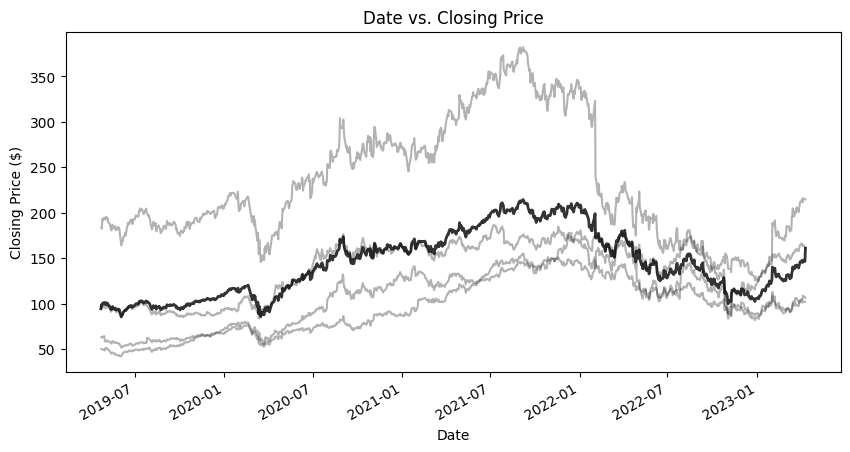

In [5]:
# Part 1: Closing price of at least 4 stocks for the past 1000 trading days

fb_hist = fb.history(period="max", auto_adjust=True) 
amzn_hist = amzn.history(period="max", auto_adjust=True) 
aapl_hist = aapl.history(period="max", auto_adjust=True) 
goog_hist = goog.history(period="max", auto_adjust=True) 

# merge data into a single DataFrame
df = pd.concat([fb_hist.tail(1000)['Close'], amzn_hist.tail(1000)['Close'], aapl_hist.tail(1000)['Close'], goog_hist.tail(1000)['Close']], axis=1)

# set column names
df.columns = ['FB', 'AMZN', 'AAPL', 'GOOG']

# add date column
df['Avg'] = df.mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 5))

df[['FB', 'AMZN', 'AAPL', 'GOOG']].plot(ax=ax,color='black', alpha=0.3,legend=False)

df['Avg'].plot(ax=ax, color='black', alpha=0.8, linewidth=2)

plt.title('Date vs. Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')

plt.show()

In [6]:
# Part 2: Percent stacked area chart of volume of the stocks for the past 1000 trading days

fb_hist = fb.history(period="max", auto_adjust=True) 
amzn_hist = amzn.history(period="max", auto_adjust=True) 
aapl_hist = aapl.history(period="max", auto_adjust=True) 
goog_hist = goog.history(period="max", auto_adjust=True) 

# merge data into a single DataFrame
df = pd.concat([fb_hist.tail(1000)['Volume'], amzn_hist.tail(1000)['Volume'], aapl_hist.tail(1000)['Volume'], goog_hist.tail(1000)['Volume']], axis=1)
df.columns = ['FB', 'AMZN', 'AAPL', 'GOOG']
df

,FB,AMZN,AAPL,GOOG
Date,,,,
2019-04-23 00:00:00-04:00,19954800,92808000,93292000,26398000
2019-04-24 00:00:00-04:00,37289900,73516000,70162400,20376000
2019-04-25 00:00:00-04:00,54148800,121982000,74172800,22146000
2019-04-26 00:00:00-04:00,22075000,168652000,74596400,24828000
2019-04-29 00:00:00-04:00,19641300,80426000,88818800,49988000
...,...,...,...,...
2023-04-04 00:00:00-04:00,21026400,48662500,46278300,20377200
2023-04-05 00:00:00-04:00,19396600,45175400,51511700,21864200
2023-04-06 00:00:00-04:00,26104400,43808000,45390100,34684200


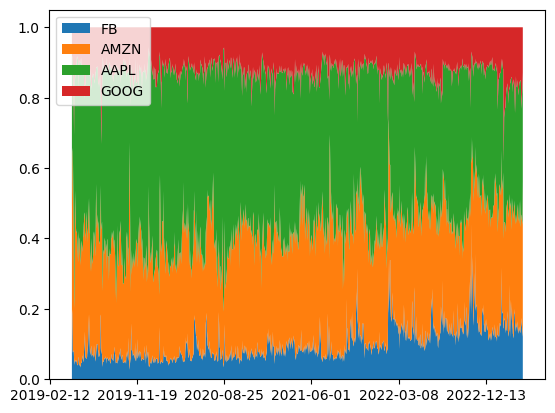

In [7]:
df_pct = df.div(df.sum(axis=1), axis=0)

fig, ax = plt.subplots()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=40))

ax.stackplot(df_pct.index, df_pct.values.T, labels=df_pct.columns)

ax.legend(loc='upper left')

plt.show()



```
# Some useful functions you might want to use:

df.tail(n) # returns the n last rows of a dataframe
df.reset_index() # sets the first row's index to 0
df.copy() # returns a copy of a dataframe. Changing this copy does not change the original dataframe.

# You can directly convert columns to numpy arrays as follows:

y = np.array([df['volume']) # puts the 'volume' column of a dataframe into an array
```



Example solution for part 1, using the past 1000 trading days for FB, AMZN, AAPL, and GOOGL tickers. Dark black line depicts the mean of the four prices.

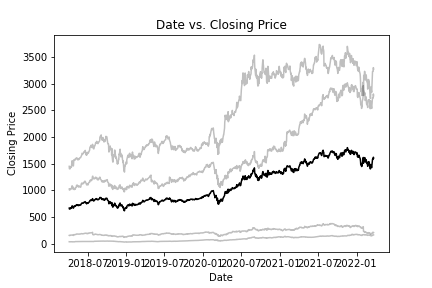

Example solution for part 2, using the past 1000 trading days for FB, AMZN, AAPL, and GOOGL tickers.

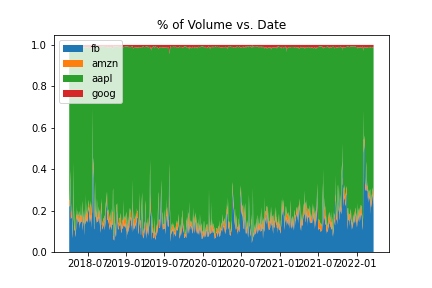